In [56]:
import random
import time
import importlib
import game
importlib.reload(game)
import gameEnvF 
importlib.reload(gameEnvF)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag, alphabeta
print(tf.__version__)

colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6,colors)
#env.close()

2.8.0


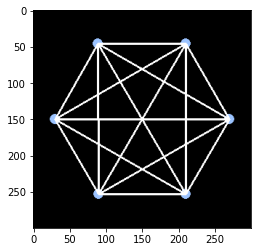

In [3]:
draw(env)

In [4]:
env = ColorableCliqueGame(300,300,6,colors)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1]
0.0


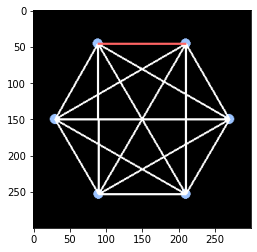

In [5]:
moves = env.getMoves()
random_move(env)
print(env.state1D())
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

(False, 0)
-1
0.0


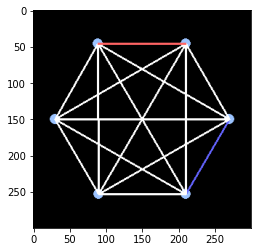

In [6]:
md = alphabetaMove(env, 3, triangle_huristic)
print(md)
print(env.winner)
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

1


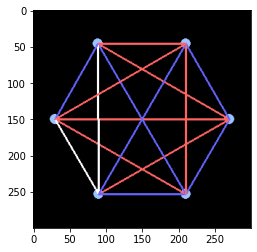

In [7]:
while(env.winner == -1):
    alphabetaMove(env,1, triangle_huristic)
print(env.winner)
draw(env)

In [8]:
#envt = ColorableCliqueGame(300,300,6,colors)
def test(test_num, random_moves, depth, huristic_func):
    player0Wins = 0
    player1Wins = 0
    for r in range(test_num):
        envt = ColorableCliqueGame(300,300,6,colors)
        for _ in range(random_moves):
            random_move(envt)
        #print(envt.winner)
        while(envt.winner == -1):
            #print(envt.player)
            alphabetaMove(envt, depth, huristic_func)
        #print(envt.winner)
        if envt.winner == 0:
            player0Wins += 1
        else:
            player1Wins += 1
        if r % 5 == 0:
            print("round ",r)
    print("player0 won :", player0Wins, "player1 won :", player1Wins)

In [9]:
test(10, 1, 5, triangle_huristic)

round  0
round  5
player0 won : 9 player1 won : 1


### Get all possible positions legal and illegal

In [10]:
from game import nCr

allp = getPsuedoLegalStates()
print("size : ", len(allp))

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
size :  14348907


In [11]:
allp[0]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

### Sort the ilegal positions, and create the tag.

In [12]:
import importlib
import game
importlib.reload(game)
from game import ColorableCliqueGame

env = ColorableCliqueGame(300,300,6,colors)

In [57]:
X = getLegalStatesAndTag(allp[::100], 3, triangle_huristic, log=250000)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


KeyboardInterrupt: 

In [87]:
def getLegalStatesAndTag(psuedoLegalStates, depth, huristic_function, log=100000):
    X = []
    counter = 0
    colors = [(255, 100, 100), (100, 100, 255)]
    env = ColorableCliqueGame(300, 300, 6, colors)
    co = 0
    for state in psuedoLegalStates:
        if abs(state).sum() < 4:
            continue
        # env.reset()
        counter += 1
        if counter % log == 0:
            print("ab", counter)
            # break
        if env.loadfrom1D(state):
            scoreab = alphabeta(env, -99999, 99999, 3, env.player == 0, triangle_huristic)

            scoremd = alphabetaMaxDepth(env, 3, -99999,
                                        99999, huristic_function)

            if abs(scoreab) < 100: 
                print(env.state1D(), scoreab, scoremd)
                X.append([env.state1D(), scoreab, scoremd])
                co += 1
                if co > 5:
                    break
    X = np.array(X)
    return X

In [89]:
Xr = getLegalStatesAndTag(allp[::100], 3, triangle_huristic, log=250000)
print("----")
X = getLegalStatesAndTag(list(Xr[:,0]), 3, triangle_huristic, log=250000)

[ 0  1 -1  0  1  1  1  0 -1  0  0 -1  0 -1 -1  1] 0.0 97.5
[ 0  1  1  0 -1  0  1  1 -1  0  0 -1  0 -1 -1  1] -81.0 97.5
[ 0  1  0  1  0  1  0 -1  0  0  0 -1  0 -1 -1  1] -0.7290000000000001 97.5
[ 1  0  0  0  0  1  1 -1  0  0  0 -1  0 -1 -1  1] -1.4580000000000002 97.5
[-1  1 -1  1  1  1  1 -1  0  0  0 -1  0 -1 -1  1] -81.0 -95.0625
[ 1 -1  1  1  1  0 -1  0  0  0  0 -1  0 -1 -1  1] -0.7290000000000001 92.6859375
----
[ 0  1 -1  0  1  1  1  0 -1  0  0 -1  0 -1 -1  1] 0.0 97.5
[ 0  1  1  0 -1  0  1  1 -1  0  0 -1  0 -1 -1  1] -81.0 97.5
[ 0  1  0  1  0  1  0 -1  0  0  0 -1  0 -1 -1  1] -0.7290000000000001 97.5
[ 1  0  0  0  0  1  1 -1  0  0  0 -1  0 -1 -1  1] -1.4580000000000002 97.5
[-1  1 -1  1  1  1  1 -1  0  0  0 -1  0 -1 -1  1] -81.0 -95.0625
[ 1 -1  1  1  1  0 -1  0  0  0  0 -1  0 -1 -1  1] -0.7290000000000001 92.6859375


C:\Users\Michael\AppData\Local\Temp\ipykernel_995224\236147768.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [80]:
list(X[:,0])

[array([ 0,  1, -1,  0,  1,  1,  1,  0, -1,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64),
 array([ 0,  1,  1,  0, -1,  0,  1,  1, -1,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64),
 array([ 0,  1,  0,  1,  0,  1,  0, -1,  0,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64),
 array([ 1,  0,  0,  0,  0,  1,  1, -1,  0,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64),
 array([-1,  1, -1,  1,  1,  1,  1, -1,  0,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64),
 array([ 1, -1,  1,  1,  1,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  1],
       dtype=int64)]

In [72]:
X[1]

array([array([ 0,  1,  1,  0, -1,  0,  1,  1, -1,  0,  0, -1,  0, -1, -1,  1],
             dtype=int64)                                                     ,
       -81.0, 97.5], dtype=object)

In [92]:
drawIndex = 0
env = ColorableCliqueGame(300,300,6,colors)
print(X[drawIndex][0], X[drawIndex][1], X[drawIndex][2])
print(env.loadfrom1D(X[drawIndex][0]))

print("max min : ",alphabetaMaxDepth(env, -99999, 99999, 3, triangle_huristic))
print("alpha beta : ",alphabeta(env, -99999, 99999, 3, env.player == 0, triangle_huristic))
print(env.state1D())


# [ 1  1  1  1  1 -1  0 -1  0  0  0 -1  0 -1 -1  1] -97.5
# True
# -97.5
# -1

[ 0  1 -1  0  1  1  1  0 -1  0  0 -1  0 -1 -1  1] 0.0 97.5
True
max min :  0.0
alpha beta :  90.0
[ 0  1 -1  0  1  1  1  0 -1  0  0 -1  0 -1 -1  1]


In [16]:
# def save(X, name, maxSize):
#     folds = int(X.shape[0] / maxSize)
#     for i in range(folds):
#         sn = name + "_p" + i + ".npy"
#         with open(sn, 'wb') as f:
#             np.save(f, X[i * maxSize: (i+1) * maxSize])
#save(X, "K6D3", 10000)
#import gzip

filename = 'data\K6D3n.npz'
with open(filename, 'wb') as f:
    np.savez_compressed(f, data=X)
    #f.close()
#np.savez_compressed('/tmp/123', a=X)

In [17]:
with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)
    data = a['data']

In [18]:
print(data[0])
print(X[0])

[array([-1,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1, -1, -1, -1,  1],
       dtype=int64)
 -100 -100]
[array([-1,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1, -1, -1, -1,  1],
       dtype=int64)
 -100 -100]
